In [1]:
# Script Name: Combination of Temperature and Energy Demand
# Author: Rahul Kumar
# Date: 4/3/22
# Description: The purpose of the script is to combine the temperature and energy demand data into a unified dataset that 
# can be used to work with

import pandas as pd
import numpy as np
from math import sqrt
import seaborn as sns

# This actually sets the pandas display to show all rows and columns 
# when you are showing a dataframe, without skipping the center
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

In [2]:
filepath = '../../H06-2021/' # If you want to run the code, change the file path to where you store the files. This reference
                                # is to where I store the files outside the github clone
    
outpath = '../data/'
# filename = 'totaldemand_nsw'
ext = '.csv'

states = ['nsw','qld','sa','vic']

In [3]:
# 'temprature', 'totaldemand', 'forecastdemand'

filename = 'temprature' #<-correct your NSW temperature filename to temprature
temp = pd.DataFrame(columns=['LOCATION','DATETIME','TEMPERATURE'])

for state in states:
    input = pd.read_csv(filepath+filename+'_'+state+ext)
    temp = pd.concat([temp,input], ignore_index=True)
    
temp.to_csv(outpath+filename+ext)
temp = temp[['LOCATION','DATETIME','TEMPERATURE']]
temp.head(15)

,LOCATION,DATETIME,TEMPERATURE
0,Bankstown,1/1/2010 0:00,23.1
1,Bankstown,1/1/2010 0:01,23.1
2,Bankstown,1/1/2010 0:30,22.9
3,Bankstown,1/1/2010 0:50,22.7
4,Bankstown,1/1/2010 1:00,22.6
5,Bankstown,1/1/2010 1:30,22.5
6,Bankstown,1/1/2010 2:00,22.5
7,Bankstown,1/1/2010 2:30,22.4
8,Bankstown,1/1/2010 3:00,22.3
9,Bankstown,1/1/2010 3:30,22.3


In [4]:
filename = 'totaldemand'
demand = pd.DataFrame(columns=['DATETIME','TOTALDEMAND','REGIONID'])

for state in states:
    input = pd.read_csv(filepath+filename+'_'+state+ext)
    demand = pd.concat([demand,input], ignore_index=True)
    
demand.to_csv(outpath+filename+ext)

demand.head(15)

,DATETIME,TOTALDEMAND,REGIONID
0,1/1/2010 0:00,8038.00,NSW1
1,1/1/2010 0:30,7809.31,NSW1
2,1/1/2010 1:00,7483.69,NSW1
3,1/1/2010 1:30,7117.23,NSW1
4,1/1/2010 2:00,6812.03,NSW1
5,1/1/2010 2:30,6544.33,NSW1
6,1/1/2010 3:00,6377.32,NSW1
7,1/1/2010 3:30,6282.85,NSW1
8,1/1/2010 4:00,6211.49,NSW1
9,1/1/2010 4:30,6248.31,NSW1


In [5]:
filename = 'combined'
combined = temp.merge(demand, left_on='DATETIME', right_on = 'DATETIME')
combined['DATETIME'] = pd.to_datetime(combined['DATETIME'])

combined.to_csv(outpath+filename+ext)
combined.head(15)

,LOCATION,DATETIME,TEMPERATURE,TOTALDEMAND,REGIONID
0,Bankstown,2010-01-01 00:00:00,23.1,8038.00,NSW1
1,Bankstown,2010-01-01 00:30:00,22.9,7809.31,NSW1
2,Bankstown,2010-01-01 01:00:00,22.6,7483.69,NSW1
3,Bankstown,2010-01-01 01:30:00,22.5,7117.23,NSW1
4,Bankstown,2010-01-01 02:00:00,22.5,6812.03,NSW1
5,Bankstown,2010-01-01 02:30:00,22.4,6544.33,NSW1
6,Bankstown,2010-01-01 03:00:00,22.3,6377.32,NSW1
7,Bankstown,2010-01-01 03:30:00,22.3,6282.85,NSW1
8,Bankstown,2010-01-01 04:00:00,22.1,6211.49,NSW1
9,Bankstown,2010-01-01 04:30:00,22.2,6248.31,NSW1


In [6]:
combined.groupby('REGIONID').describe()

TEMPERATURE                                                    \
               count       mean       std  min   25%   50%   75%   max   
REGIONID                                                                 
NSW1        279779.0  18.387445  5.908628 -1.3  14.3  18.6  22.4  44.7   
QLD1        195725.0  20.417530  5.635937  1.3  16.6  20.9  24.4  42.4   
SA1         195724.0  20.417513  5.635947  1.3  16.6  20.9  24.4  42.4   
VIC1        195725.0  20.417530  5.635937  1.3  16.6  20.9  24.4  42.4   

         TOTALDEMAND                                                         \
               count         mean          std      min       25%       50%   
REGIONID                                                                      
NSW1        279779.0  7957.513156  1266.855241  5074.63  7031.285  7895.980   
QLD1        195725.0  6026.383778   868.761954  3748.24  5368.590  5993.220   
SA1         195724.0  1383.848368   326.428606    21.89  1164.480  1346.105   
VIC1        195725.0  5252.184045   946.145127  2307.07  4534.800  5156.920   

                             
              75%       max  
REGIONID                     
NSW1      8745.41  14579.86  
QLD1      6601.29   9988.09  
SA1       1567.21   3385.42  
VIC1      5908.38  10240.22

In [7]:
combined.groupby('LOCATION').describe()

TEMPERATURE                                  \
                                   count       mean       std  min   25%   
LOCATION                                                                   
Adelaide (Kent Town)            587174.0  20.417524  5.635931  1.3  16.6   
Bankstown                       195947.0  17.530995  5.884212 -1.3  13.5   
Brisbane Archerfield Airport     48525.0  22.623126  4.327408  7.4  19.7   
Melbourne (Olympic Park)         35307.0  17.319172  5.374606  4.3  13.7   

                                               TOTALDEMAND               \
                               50%   75%   max       count         mean   
LOCATION                                                                  
Adelaide (Kent Town)          20.9  24.4  42.4    587174.0  4220.810229   
Bankstown                     17.9  21.5  44.7    195947.0  8111.924589   
Brisbane Archerfield Airport  22.6  25.5  41.1     48525.0  7654.233512   
Melbourne (Olympic Park)      16.2  19.9  43.2     35307.0  7517.379123   

                                                                       \
                                      std      min      25%       50%   
LOCATION                                                                
Adelaide (Kent Town)          2170.151411    21.89  1567.21  4916.015   
Bankstown                     1299.171401  5074.63  7149.43  8052.180   
Brisbane Archerfield Airport  1120.783609  5074.63  6819.61  7633.890   
Melbourne (Olympic Park)      1082.433071  5113.03  6725.55  7491.730   

                                                   
                                    75%       max  
LOCATION                                           
Adelaide (Kent Town)          5960.2675  10240.22  
Bankstown                     8956.9850  14579.86  
Brisbane Archerfield Airport  8349.2200  12986.04  
Melbourne (Olympic Park)      8163.9550  12986.04

<AxesSubplot:xlabel='TEMPERATURE', ylabel='TOTALDEMAND'>

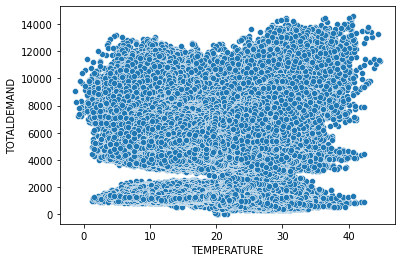

In [8]:
sns.scatterplot(data=combined, x="TEMPERATURE", y="TOTALDEMAND")

In [9]:
# 

In [10]:
test = temp
# hrt_1 = temp.set_index('DATETIME').resample('1h').sum()


test['DATETIME'] = pd.to_datetime(test['DATETIME'])

In [11]:
test.head(15)

,LOCATION,DATETIME,TEMPERATURE
0,Bankstown,2010-01-01 00:00:00,23.1
1,Bankstown,2010-01-01 00:01:00,23.1
2,Bankstown,2010-01-01 00:30:00,22.9
3,Bankstown,2010-01-01 00:50:00,22.7
4,Bankstown,2010-01-01 01:00:00,22.6
5,Bankstown,2010-01-01 01:30:00,22.5
6,Bankstown,2010-01-01 02:00:00,22.5
7,Bankstown,2010-01-01 02:30:00,22.4
8,Bankstown,2010-01-01 03:00:00,22.3
9,Bankstown,2010-01-01 03:30:00,22.3


In [12]:
hrt_1 = test.set_index('DATETIME').resample('30T').mean()

In [13]:
hrt_1.head(15)

,TEMPERATURE
DATETIME,
2010-01-01 00:00:00,23.350000
2010-01-01 00:30:00,23.250000
2010-01-01 01:00:00,23.200000
2010-01-01 01:30:00,22.566667
2010-01-01 02:00:00,22.166667
2010-01-01 02:30:00,22.066667
2010-01-01 03:00:00,22.100000
2010-01-01 03:30:00,21.700000
2010-01-01 04:00:00,21.700000


In [14]:
df = test.set_index('DATETIME')
df = df[(df.index.minute <= 15)|(df.index.minute >= 45)]

In [15]:
df.head(15)

,LOCATION,TEMPERATURE
DATETIME,,
2010-01-01 00:00:00,Bankstown,23.1
2010-01-01 00:01:00,Bankstown,23.1
2010-01-01 00:50:00,Bankstown,22.7
2010-01-01 01:00:00,Bankstown,22.6
2010-01-01 02:00:00,Bankstown,22.5
2010-01-01 03:00:00,Bankstown,22.3
2010-01-01 04:00:00,Bankstown,22.1
2010-01-01 05:00:00,Bankstown,22.2
2010-01-01 06:00:00,Bankstown,22.5
